In [1]:
# Name    : Prince Dubey
# Roll No : G23AI2014

# Importing dependencies.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Printing versions of the libraries for future use

print("numpy   :", np.__version__)
print("sklearn :", sklearn.__version__)
print("pandas  :", pd.__version__)
print("seaborn :", sns.__version__)
import sys
print(f"Python version is :{ sys.version} ")


numpy   : 1.21.5
sklearn : 1.0.2
pandas  : 1.4.2
seaborn : 0.11.2
Python version is :3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)] 


# Loading dataset and analysis 

In [4]:
customer_data=pd.read_csv("Mall_Customers.csv")

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.shape

(200, 5)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checking for missing values in dataset 
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

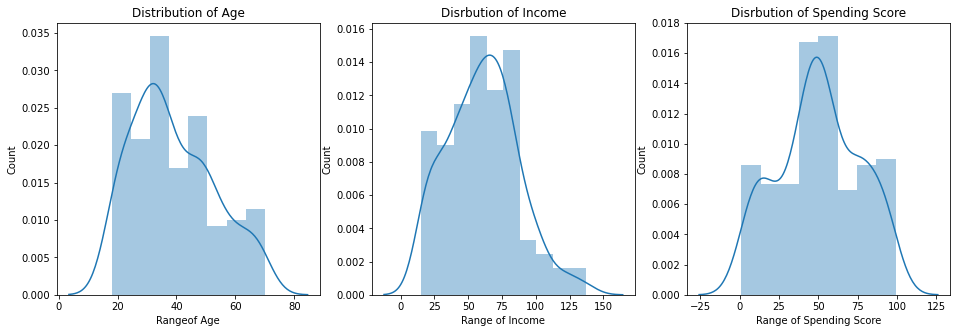

In [9]:
# Ploating chart to check the distribution of the data to find outliers

plt.figure(figsize=(16,5))

#Checking distribution of customer age

plt.subplot(1,3,1)
sns.distplot(customer_data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Rangeof Age')
plt.ylabel('Count')

#Checking distribution of customer's Anual income range

plt.subplot(1, 3,2)
sns.distplot(customer_data['Annual Income (k$)'])
plt.title("Disrbution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

#Checking distribution of customer's spending score

plt.subplot(1, 3, 3)
sns.distplot(customer_data['Spending Score (1-100)'])
plt.title("Disrbution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()


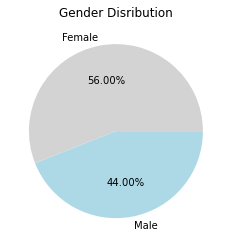

In [10]:
#checking who is spending more male or female.

df=customer_data.groupby('Gender').size()
df.plot(kind='pie', subplots = True, colors = ['lightgray', 'lightblue'],explode = [0, 0.001],
        labels = ['Female', 'Male'],autopct = '%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel("")
plt.show()


<AxesSubplot:>

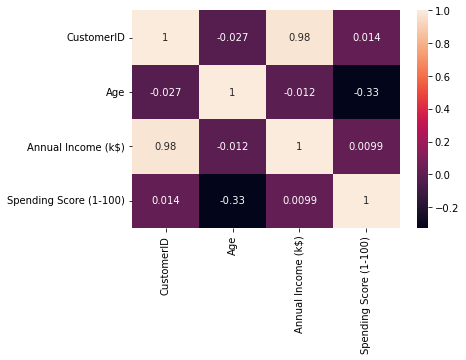

In [11]:
#checking the correlation between the features 
sns.heatmap(customer_data.corr(),annot=True)

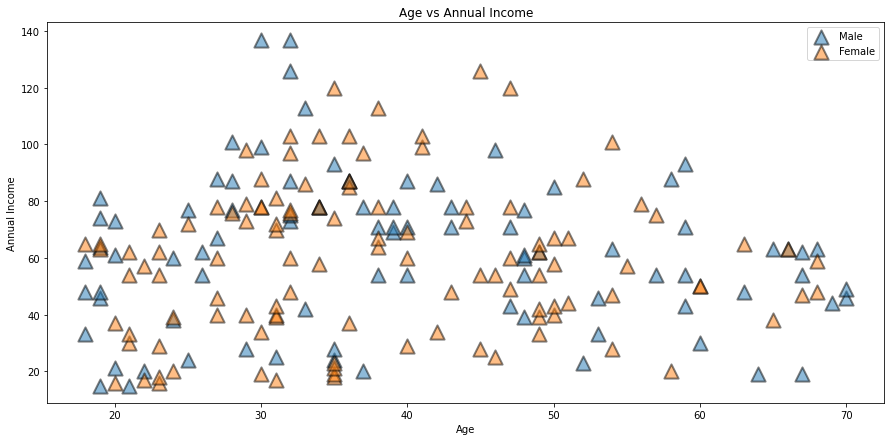

In [12]:
#checking distribution of age against annual income
plt.figure(figsize=(15,7))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = customer_data[customer_data['Gender'] == gender],
                s = 200, alpha = 0.5,marker="^",edgecolor ="Black",linewidths = 2,label = gender)
    
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income")
plt.legend()
plt.show()


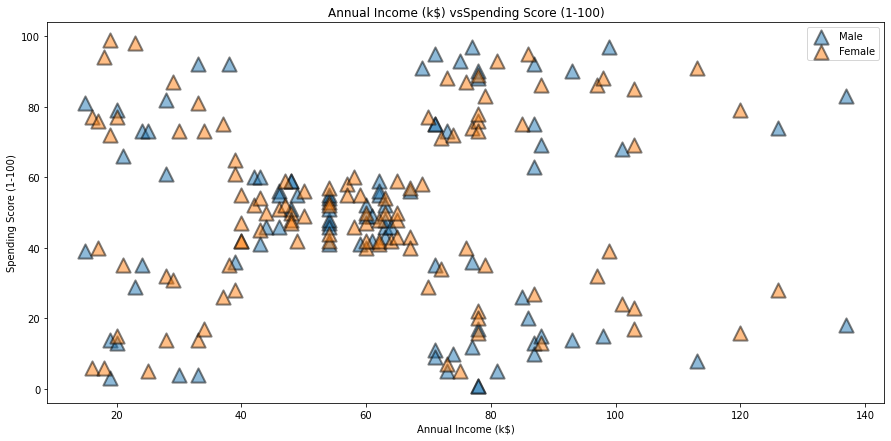

In [13]:
#checking distribution of Spending Score against annual income
plt.figure(figsize=(15,7))

for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)', data = customer_data[customer_data['Gender'] == gender],
                s = 200, alpha = 0.5,marker="^",edgecolor ="Black",linewidths = 2,label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income (k$) vsSpending Score (1-100)')
plt.legend()
plt.show()

# Now working towards building model

In [14]:
#collecting required columns to build the model. 
# As we know Customer ID, Age, and Gender does 
#not making much contribution in classinfying the segmentation we will take only columns 3 and 4

X=customer_data.iloc[:,[3,4]].values

In [16]:
# As we dont know how many cluster could be in our dataset 
# hence we could find that by using formula called WCSS - Within clusters sum of squares
# We will be using elbow graph to find optimum numbers of clusters

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    

Text(0, 0.5, 'WCSS')

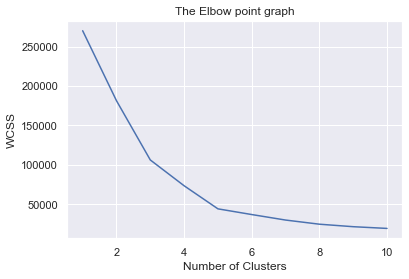

In [17]:
#Ploting elbow method

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


In [18]:
# Looking at the elbow chart we can see there is no significant downfall in curve after 4th clusters hence we will choose 5 as
# optimum numbers of clusters for our dataset

#Optimum number of clusters = 5

# Training K-Means model 

In [19]:
kmeans=KMeans(n_clusters=5, init="k-means++",random_state=0)
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualising the clusters 

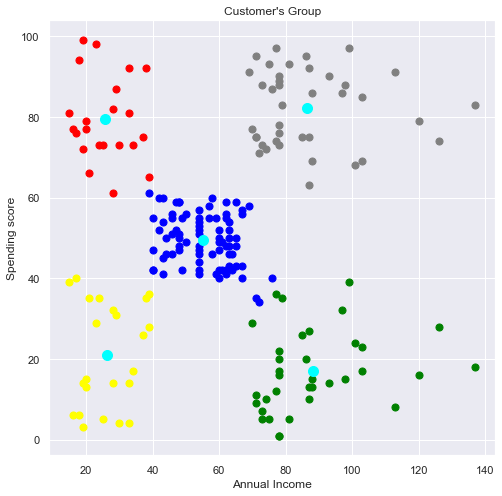

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50, c='Green', label='Cluster - 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50, c='Blue', label='Cluster - 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50, c='Gray', label='Cluster - 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50, c='Red', label='Cluster - 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50, c='Yellow', label='Cluster - 5')

# ploatting the centroid 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='cyan', label='centroids')

plt.title("Customer's Group")
plt.xlabel('Annual Income')
plt.ylabel('Spending score')

plt.show()

# Creating model for deployment

In [21]:
with open('model.pkl','wb') as file:
    pickle.dump(kmeans,file)
    